https://stackoverflow.com/questions/17531684/n-grams-in-python-four-five-six-grams

In [163]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [10]:
# 算2-gram、3-gram、4-gram的頻率反覆次數
text = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = nltk.wordpunct_tokenize(text)
fourgrams = nltk.collocations.QuadgramCollocationFinder.from_words(tokens)
total = len(fourgrams.ngram_fd.items())
for fourgram, freq in fourgrams.ngram_fd.items():
    proportion = freq / total
    print(fourgram, freq, proportion)

('I', 'do', 'not', 'like') 2 0.14285714285714285
('do', 'not', 'like', 'green') 1 0.07142857142857142
('not', 'like', 'green', 'eggs') 1 0.07142857142857142
('like', 'green', 'eggs', 'and') 1 0.07142857142857142
('green', 'eggs', 'and', 'ham') 1 0.07142857142857142
('eggs', 'and', 'ham', ',') 1 0.07142857142857142
('and', 'ham', ',', 'I') 1 0.07142857142857142
('ham', ',', 'I', 'do') 1 0.07142857142857142
(',', 'I', 'do', 'not') 1 0.07142857142857142
('do', 'not', 'like', 'them') 1 0.07142857142857142
('not', 'like', 'them', 'Sam') 1 0.07142857142857142
('like', 'them', 'Sam', 'I') 1 0.07142857142857142
('them', 'Sam', 'I', 'am') 1 0.07142857142857142
('Sam', 'I', 'am', '!') 1 0.07142857142857142


In [128]:
# sentence為生成後的歌詞
sentence = "What's my name?\
            Go\
            Tell me\
            Why did you keep a secret\
            Why did you leave the key to the kingdom\
            Why did you keep a secret?\
            Why did you love me?\
            Why did you make me feel guilty?\
            Why did you try to ruin my love for eve\
            Why did you love me\
            Why did you fail to hate me?\
            Why did you act so proud?\
            Why did you ignore me?\
            Why did you feel so proud?\
            Is it right\
            You know it's time to let go\
            And if I, with my rage, only keep some"
tokens = nltk.wordpunct_tokenize(sentence) # 歌詞單詞化
print(tokens)

['What', "'", 's', 'my', 'name', '?', 'Go', 'Tell', 'me', 'Why', 'did', 'you', 'keep', 'a', 'secret', 'Why', 'did', 'you', 'leave', 'the', 'key', 'to', 'the', 'kingdom', 'Why', 'did', 'you', 'keep', 'a', 'secret', '?', 'Why', 'did', 'you', 'love', 'me', '?', 'Why', 'did', 'you', 'make', 'me', 'feel', 'guilty', '?', 'Why', 'did', 'you', 'try', 'to', 'ruin', 'my', 'love', 'for', 'eve', 'Why', 'did', 'you', 'love', 'me', 'Why', 'did', 'you', 'fail', 'to', 'hate', 'me', '?', 'Why', 'did', 'you', 'act', 'so', 'proud', '?', 'Why', 'did', 'you', 'ignore', 'me', '?', 'Why', 'did', 'you', 'feel', 'so', 'proud', '?', 'Is', 'it', 'right', 'You', 'know', 'it', "'", 's', 'time', 'to', 'let', 'go', 'And', 'if', 'I', ',', 'with', 'my', 'rage', ',', 'only', 'keep', 'some']


In [129]:
result_freq = []

In [148]:
# 設計n-gram通用頻率計算函式 https://hambao.pixnet.net/blog/post/18823664
def ngram_freq(mylist,n):
    # 切割成n個單位，產生lst_ngram
    lst_ngram = [mylist[i:i+n] for i in range(0,len(mylist)-(n-1))]
    #print('lst_ngram:',lst_ngram)
       
    freqdict = dict()
    for (ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,ch17,ch18,ch19,ch20) in lst_ngram:
        freqdict[(ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,ch17,ch18,ch19,ch20)] = freqdict.get((ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,ch17,ch18,ch19,ch20),0) + 1
    #print('freqdict:',freqdict)
    
    freqdictsorted = sorted(freqdict.items(), key=itemgetter(1), reverse=True)
    final = []
    lst_freq = []
    for (token,num) in freqdictsorted:
        freq = num / len(freqdictsorted)
        lst_freq.append(freq)
        tmp = []
        tmp.append(list(token))
        tmp.append(num)
        tmp.append(round(freq,4))
        #print(list(token),'\t',num,'\t',round(freq,4))
        final.append(tmp)
    #print('final:',final)
    avg_lst_freq = sum(lst_freq) / len(lst_freq)
    #print('avg_lst_freq:',avg_lst_freq)
    return avg_lst_freq

tokens_ngram = ngram_freq(tokens,20)
print(tokens_ngram)
print()
result_freq.append(tokens_ngram)
print(result_freq)

0.010869565217391323

[0.020087655222790383, 0.015086505190311388, 0.011966759002770099, 0.010284505959246428, 0.009614512471655316, 0.00952380952380951, 0.009615384615384602, 0.009708737864077667, 0.009803921568627437, 0.009900990099009908, 0.010000000000000007, 0.010101010101010081, 0.01020408163265307, 0.01030927835051545, 0.010416666666666652, 0.010526315789473696, 0.010638297872340408, 0.010752688172043003, 0.010869565217391323]


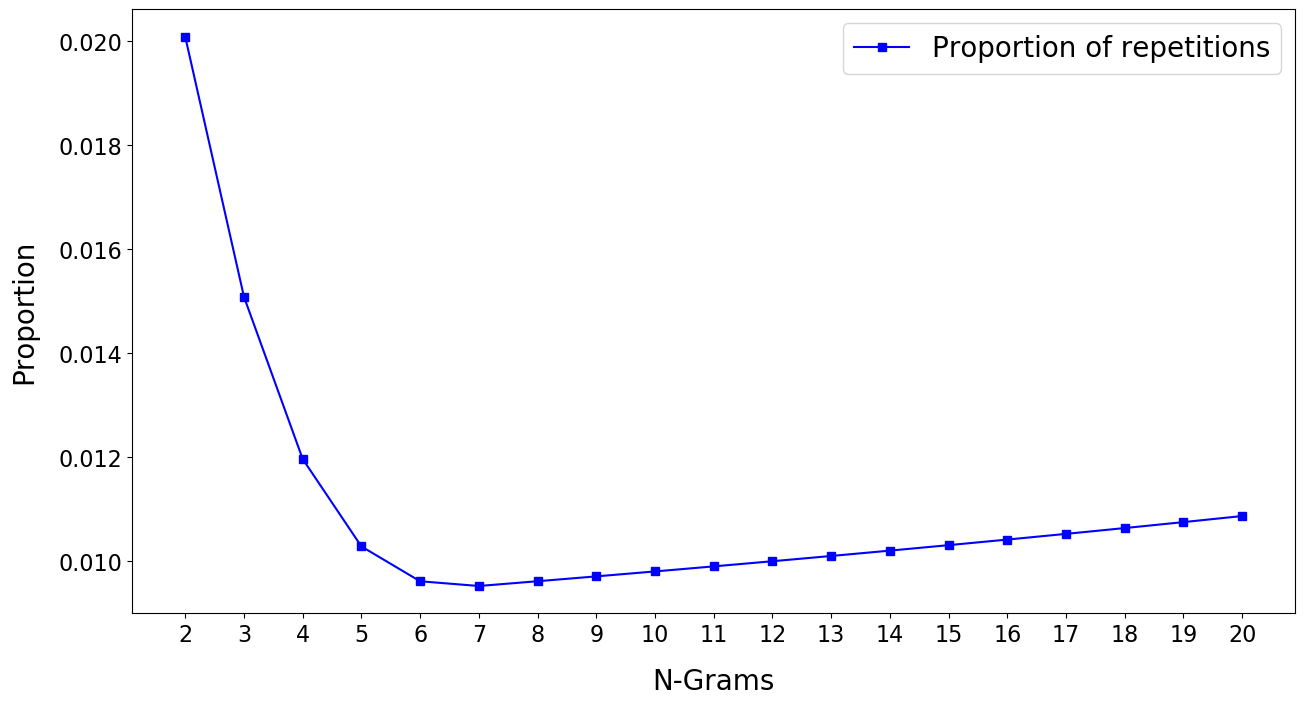

In [165]:
ngram_list = [i for i in range(2, 21)]
plt.figure(figsize=(15,8), dpi=100, linewidth=2)
plt.plot(ngram_list,result_freq,'s-',color='b',label='Proportion of repetitions')
plt.xticks(np.linspace(2, 20, 19),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("N-Grams",fontsize=20, labelpad=15)
plt.ylabel("Proportion",fontsize=20, labelpad=15)
plt.legend(loc='best',fontsize=20)
plt.show()

# --

In [101]:
n = 3 
num_list = ['ch'+ str(i) for i in range(1, n+1)]
print(num_list)

num_list2 = ('[' + ','.join(num_list) + ']').replace('[','(').replace(']',')')
#um_list2 = ', '.join(num_list)

print(type(num_list2))
print(num_list2)

['ch1', 'ch2', 'ch3']
<class 'str'>
(ch1,ch2,ch3)
